# Imports

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC as SupportVectorClf
from sklearn.svm import SVR as RBFSVR
from src.get_data import *
from src.preprocessing import *
from src.create_output import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [2]:
bd_full = pd.read_csv('data/business.csv')
bd_full['attributes_AgesAllowed'].unique()

array([nan, '21plus', 'allages', '19plus', '18plus'], dtype=object)

In [3]:
b_data, u_data, reviews = get_training_data(verbose=True)
v_queries = get_validation_reviews()

X, y = construct_design_matrix(b_data, u_data, reviews, verbose=True)
X_valid, y_valid = construct_design_matrix(b_data, u_data, v_queries, verbose=True)


b_data.head()

========== Feature 'attributes_AgesAllowed' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_GoodForKids' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_OutdoorSeating' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsDelivery' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsGoodForGroups' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsPriceRange2' ==========
TYPE: numeric.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsReservations' ==========
TYPE: 

,attributes_GoodForKids,attributes_OutdoorSeating,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,stars,attributes_AgesAllowedNAN,attributes_AgesAllowed21PLUS,attributes_AgesAllowedALLAGES,attributes_AgesAllowed19PLUS,attributes_AgesAllowed18PLUS,attributes_WiFiNO,attributes_WiFiFREE,attributes_WiFiNAN,attributes_WiFiPAID
business_id,,,,,,,,,,,,,,,,
KuxDPl6UYNLxFChPm0_MNw,0.0,1.0,0.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
6SAfQKe2oM5g_EtcYXyAMg,1.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
upB0RQl-l529IVwgOpwOQQ,0.0,1.0,0.0,1.0,1.0,0.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
TulmRC5V0--dnXYd_GOSvA,1.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
yqYtY3-Po4OVPafA9Z-Xyw,1.0,0.0,0.0,1.0,2.0,1.0,3.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [4]:
X_test = construct_test_matrix(b_data, u_data, verbose=True)

Constructing test feature-matrix now.
0/50078 done
10000/50078 done
20000/50078 done
30000/50078 done
40000/50078 done
50000/50078 done
Finished!


# Preprocessing / dimensionality reduction

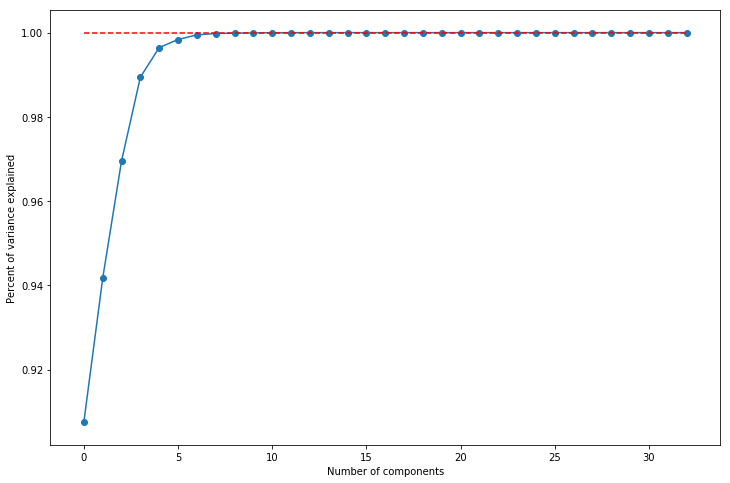

Using 10 components - 0.999978 of variance explained.


In [5]:
X_n = normalize_columns(X)
X_valid_n = normalize_columns(X_valid)

Z = get_PCA_matrix(X, n_components=10, plot_expl_variance=True, verbose=True)
X_pca = np.dot(X, Z.T)
X_valid_pca = np.dot(X_valid, Z.T)

# Hyperparameter Tuning

In [20]:
results = dict()

def rmse(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

In [21]:
X_scaled = StandardScaler().fit_transform(X)
X_valid_scaled = StandardScaler().fit_transform(X_valid)

In [26]:
min_validation_mse = (float('inf'), 0.1)
for penalty_constant in [0.01, 0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 8.0]:
    clf = RBFSVR(C=penalty_constant,
                 gamma='scale',
                 tol=5,
                 max_iter=15000)
    clf.fit(X_scaled, y)

    
    # training error
    y_pred_train = clf.predict(X_scaled)
    y_pred_train = format_output(y_pred_train)
    mse_train = rmse(y, y_pred_train)
    print('{}  <- Training RMSE with C={}'.format(mse_train, penalty_constant))

    # validation error
    y_pred_valid = clf.predict(X_valid_scaled)
    mse_valid = rmse(y_valid, y_pred_valid)
    print('{}  <- Validation RMSE with C={}'.format(mse_valid, penalty_constant))
    if mse_valid < min_validation_mse[0]:
        min_validation_mse = (mse_valid, penalty_constant)
opt_penalty = min_validation_mse[1]
print("Optimal penalty constant of {} found".format(opt_penalty))

1.3814973034755047  <- Training RMSE with C=0.01
1.5334401795545274  <- Validation RMSE with C=0.01
1.3814973034755047  <- Training RMSE with C=0.1
1.5334401795545274  <- Validation RMSE with C=0.1
1.3814973034755047  <- Training RMSE with C=0.25
1.5334401795545274  <- Validation RMSE with C=0.25
1.3814973034755047  <- Training RMSE with C=0.5
1.5334401795545274  <- Validation RMSE with C=0.5
1.3814973034755047  <- Training RMSE with C=0.75
1.5334401795545274  <- Validation RMSE with C=0.75
1.3814973034755047  <- Training RMSE with C=1.0
1.5334401795545274  <- Validation RMSE with C=1.0
1.3814973034755047  <- Training RMSE with C=1.5
1.5334401795545274  <- Validation RMSE with C=1.5
1.3814973034755047  <- Training RMSE with C=2.0
1.5334401795545274  <- Validation RMSE with C=2.0
1.3814973034755047  <- Training RMSE with C=3.0
1.5334401795545274  <- Validation RMSE with C=3.0
1.3814973034755047  <- Training RMSE with C=8.0
1.5334401795545274  <- Validation RMSE with C=8.0
Optimal penalt

In [7]:
min_validation_mse = (float('inf'), 0.1)
for penalty_constant in [0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 8.0]:
    clf = SupportVectorClf(penalty='l2', 
                           loss='squared_hinge', 
                           dual=False, 
                           C=penalty_constant,
                           max_iter=4000)
    clf.fit(X, y)

    print('')
    # training error
    y_pred_train = clf.predict(X)
    mse_train = rmse(y, y_pred_train)
    print('{}  <- Training RMSE with C={}'.format(mse_train, penalty_constant))

    # validation error
    y_pred_valid = clf.predict(X_valid)
  mse_valid = rmse(y_valid, y_pred_valid)
    print('{}  <- Validation RMSE with C={}'.format(mse_valid, penalty_constant))
    if mse_valid < min_validation_mse[0]:
        min_validation_mse = (mse_valid, penalty_constant)
opt_penalty = min_validation_mse[1]
print("Optimal penalty constant of {} found".format(opt_penalty))


1.2326515924406853  <- Training RMSE with C=0.1
1.2726294974617605  <- Validation RMSE with C=0.1

1.233501805982615  <- Training RMSE with C=0.25
1.2750828256364999  <- Validation RMSE with C=0.25

1.2300974259379258  <- Training RMSE with C=0.5
1.2746207383527761  <- Validation RMSE with C=0.5

1.2312711084569885  <- Training RMSE with C=0.75
1.277890907720634  <- Validation RMSE with C=0.75

1.232656992471756  <- Training RMSE with C=1.0
1.2727157968418255  <- Validation RMSE with C=1.0

1.2263661173454  <- Training RMSE with C=1.5
1.2667709929293725  <- Validation RMSE with C=1.5

1.2245111481945867  <- Training RMSE with C=2.0
1.2686061576241583  <- Validation RMSE with C=2.0

1.2300351949253723  <- Training RMSE with C=3.0
1.2707922859097593  <- Validation RMSE with C=3.0

1.2270850794524022  <- Training RMSE with C=8.0
1.2686848606472458  <- Validation RMSE with C=8.0
Optimal penalty constant of 1.5 found


# Test data output

In [7]:
clf_svr = RBFSVR(gamma='scale', max_iter=20000)
clf_svr.fit(X, y)
y_svr_test = clf_svr.predict(X_test)
y_svr_cleaned = format_output(y_svr_test)
write_output(y_svr_cleaned, 'svr')
print("wrote output")

/Users/Lucas/Documents/CS145/cs145_course_project/.env/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


wrote output


In [ ]:
clf = SupportVectorClf(penalty='l2', 
                       loss='squared_hinge', 
                       dual=False, 
                       C=opt_penalty,
                       max_iter=15000)
clf.fit(X, y)
y_test = clf.predict(X_test)
y_cleaned = format_output(y_test)
write_output(y_cleaned, 'svm_optimal_c')
print("wrote output")

# Normalized/PCA'd Calculations

In [12]:
# Do calculations with normalized columns
clf_n = SupportVectorClf(penalty='l2', 
                       loss='squared_hinge', 
                       dual=False, 
                       C=opt_penalty,
                       max_iter=4000)
clf_n.fit(X_n, y)

# training error (normalized columns)
y_pred_train_norm = clf_n.predict(X_n)
mse_train_norm = rmse(y, y_pred_train_norm)
print('%f  <- Training RMSE (norm)' % mse_train_norm)

# validation error (normalized columns)
y_pred_valid_norm = clf_n.predict(X_valid_n)
mse_valid_norm = rmse(y_valid, y_pred_valid_norm)
print('%f  <- Validation RMSE (norm)' % mse_valid_norm)

1.209357  <- Training RMSE (norm)
1.238031  <- Validation RMSE (norm)


In [13]:
y_n_test = clf_n.predict(X_test)
y_n_cleaned = format_output(y_test)
write_output(y_n_cleaned, 'svm_optimal_c_normalized')
print("wrote output")

wrote output


In [14]:
clf_pca = SupportVectorClf(penalty='l2', 
                       loss='squared_hinge', 
                       dual=False, 
                       C=opt_penalty,
                       max_iter=10000)
clf_pca.fit(X_pca, y)

# training error (PCA)
y_pred_train_pca = clf_pca.predict(X_pca)
mse_train_pca = rmse(y, y_pred_train_pca)
print('%f  <- Training RMSE (PCA)' % mse_train_pca)


# validation error (PCA)
y_pred_valid_pca = clf_pca.predict(X_valid_pca)
mse_valid_pca = rmse(y_valid, y_pred_valid_pca)
print('%f  <- Validation RMSE (PCA)' % mse_valid_pca)

1.422087  <- Training RMSE (PCA)
1.561987  <- Validation RMSE (PCA)


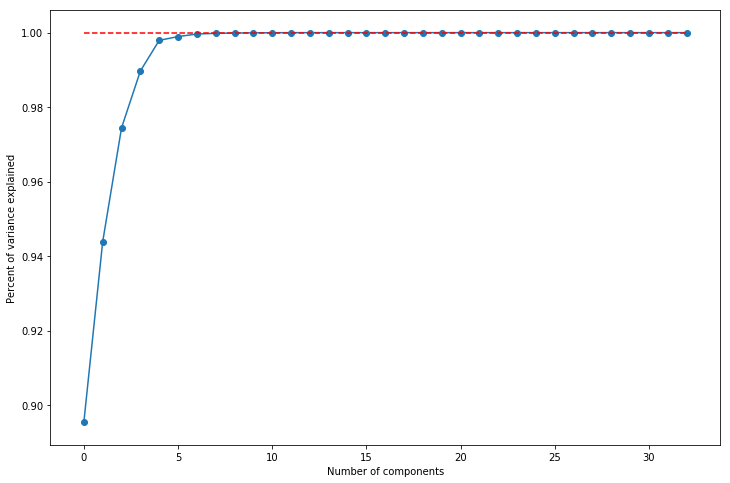

Using 10 components - 0.999983 of variance explained.
wrote output


In [17]:
Z = get_PCA_matrix(X_test, n_components=10, plot_expl_variance=True, verbose=True)
X_pca_test = np.dot(X_test, Z.T)
y_pca_test = clf_pca.predict(X_pca_test)
y_pca_cleaned = format_output(y_pca_test)
write_output(y_pca_cleaned, 'svm_optimal_c_pca')
print("wrote output")